In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision.models import alexnet, vgg16, resnet18
from torchviz import make_dot
from model import PoseModel

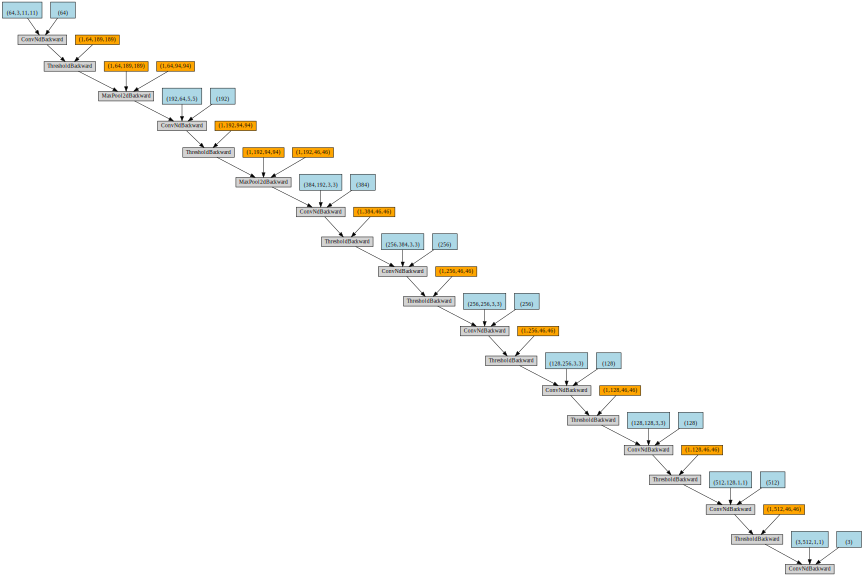

In [2]:
model = PoseModel(model_name='alexnet')
inputs = torch.randn(1, 3, 384, 384)
y = model(Variable(inputs))
make_dot(y)

In [4]:
y.size(-1)

46